# ARIMA and Seasonal ARIMA (SARIMA) for predicting Palm oil prices

## Autoregressive Integrated Moving Averages

### The general process of ARIMA:  

#### Visualize the Time Series Data
#### Make the time series data stationary
#### Plot the Correlation and AutoCorrelation Charts
#### Construct the ARIMA Model or Seasonal ARIMA based on the data
#### Use the model to make predictions


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('C:/Users/andre/Desktop/Palm_Oil_Presentation/Palm_Oil_Historical_Prices.csv')
df

,Date,Close
0,05/07/2007,787.5
1,06/07/2007,787.5
2,09/07/2007,785.0
3,10/07/2007,795.0
4,11/07/2007,825.0
...,...,...
4067,24/08/2023,950.0
4068,25/08/2023,958.0
4069,28/08/2023,945.0
4070,29/08/2023,945.0


In [3]:
# Convert 'Date' column to datetime with correct format
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Set 'Date' column as the index
df.set_index('Date', inplace=True)

In [4]:
df.head()

,Close
Date,
2007-07-05,787.5
2007-07-06,787.5
2007-07-09,785.0
2007-07-10,795.0
2007-07-11,825.0


In [5]:
df.describe()

,Close
count,4072.000000
mean,857.322529
std,255.042454
min,435.000000
25%,670.000000
50%,817.500000
75%,1022.500000
max,1990.000000


<AxesSubplot:xlabel='Date'>

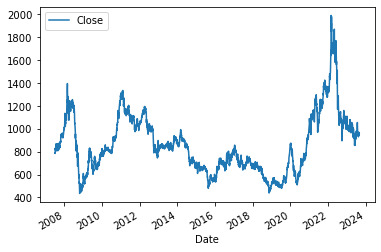

In [6]:
df.plot()

In [7]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [8]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [9]:
adfuller_test(df['Close'])

ADF Test Statistic : -2.3483500083328135
p-value : 0.15684772316886986
#Lags Used : 15
Number of Observations Used : 4056
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


#### Data is not stationary, therefore differencing needs to be applied

In [10]:
df['Close First Difference'] = df['Close'] - df['Close'].shift(1)

In [11]:
df['Close'].shift(1)

Date
2007-07-05      NaN
2007-07-06    787.5
2007-07-09    787.5
2007-07-10    785.0
2007-07-11    795.0
              ...  
2023-08-24    945.0
2023-08-25    950.0
2023-08-28    958.0
2023-08-29    945.0
2023-08-30    945.0
Name: Close, Length: 4072, dtype: float64

In [12]:
df['Close First Difference'].head()

Date
2007-07-05     NaN
2007-07-06     0.0
2007-07-09    -2.5
2007-07-10    10.0
2007-07-11    30.0
Name: Close First Difference, dtype: float64

In [13]:
## test dickey fuller again
adfuller_test(df['Close First Difference'].dropna())

ADF Test Statistic : -15.258967646433634
p-value : 4.89078491124319e-28
#Lags Used : 14
Number of Observations Used : 4056
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:xlabel='Date'>

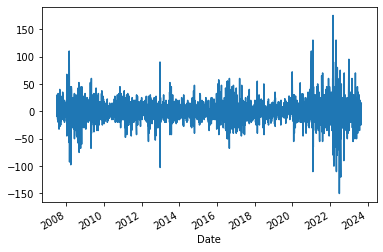

In [14]:
df['Close First Difference'].plot()

### Auto regressive Model 

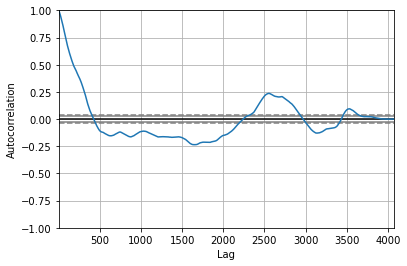

In [15]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Close'])
plt.show()

#### Final Thoughts on Autocorrelation and Partial Autocorrelation
#### Identification of an AR model is often best done with the PACF.

##### In the context of an autoregressive (AR) model, the theoretical Partial Autocorrelation Function (PACF) ceases to exhibit significant values beyond the model's order. This phenomenon is commonly described as the PACF "shutting off," signifying that, in theory, partial autocorrelations become negligible beyond a specific point. To put it differently, the count of non-zero partial autocorrelations corresponds to the order of the AR model. When we refer to the "order of the model," we are essentially identifying the furthest lag of variable x that serves as a predictor in the model.

##### When it comes to identifying an Moving Average (MA) model, it's typically more effective to rely on the Autocorrelation Function (ACF) rather than the Partial Autocorrelation Function (PACF).

In the case of an MA model, the theoretical PACF doesn't exhibit a sudden "shut-off" but instead gradually tapers towards zero. The ACF, on the other hand, provides a clearer pattern for an MA model. Within the ACF, you'll observe non-zero autocorrelations only at the lags that are directly involved in the model.

To summarize, when determining the appropriate order of an ARMA model, keep in mind the notation:

p: AR model lags
d: Differencing
q: MA model lags

In [16]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

C:\Users\andre\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


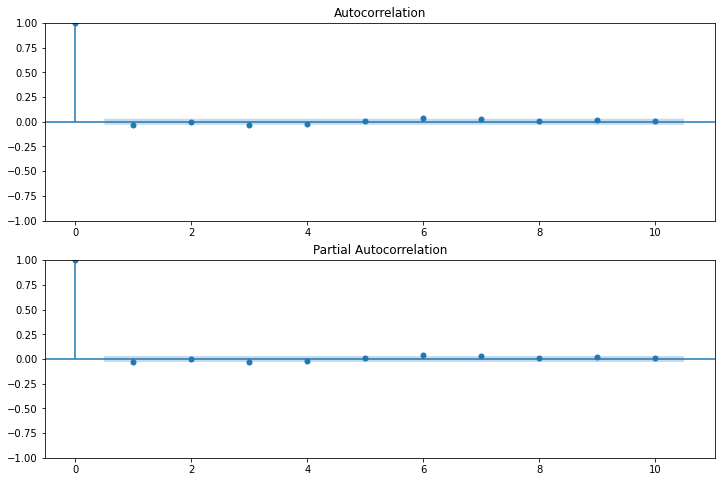

In [17]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Close First Difference'].iloc[1:],lags=10,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Close First Difference'].iloc[1:],lags=10,ax=ax2)

In [18]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima.model import ARIMA

In [19]:
model=ARIMA(df['Close'],order=(1,1,1))
model_fit=model.fit()

C:\Users\andre\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\andre\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\andre\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [20]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 4072
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -17532.796
Date:                Fri, 01 Sep 2023   AIC                          35071.593
Time:                        10:57:49   BIC                          35090.527
Sample:                             0   HQIC                         35078.298
                               - 4072                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4537      0.171      2.655      0.008       0.119       0.789
ma.L1         -0.4878      0.168     -2.911      0.004      -0.816      -0.159
sigma2       322.3456      2.954    109.116      0.0

C:\Users\andre\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<AxesSubplot:xlabel='Date'>

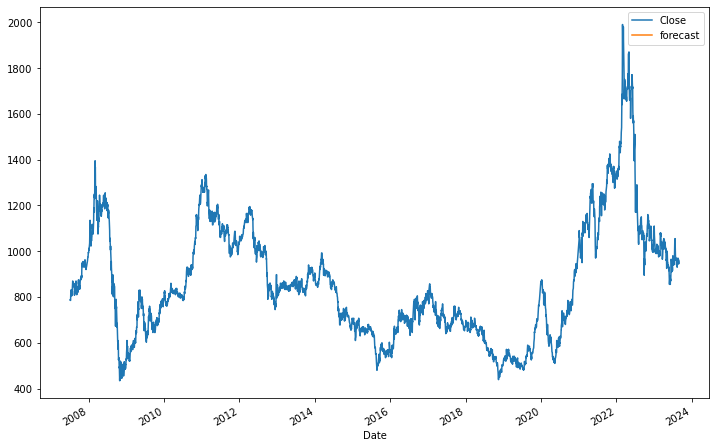

In [42]:
df['forecast']=model_fit.predict(start=950,end=4072,dynamic=True)
df[['Close','forecast']].plot(figsize=(12,8))

In [22]:
import statsmodels.api as sm

In [23]:
model=sm.tsa.statespace.SARIMAX(df['Close'],order=(1, 1, 1),seasonal_order=(1,1,1,15))
results=model.fit()

C:\Users\andre\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\andre\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [26]:
summary = results.summary()
print(summary)

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                 4072
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 15)   Log Likelihood              -17496.634
Date:                            Fri, 01 Sep 2023   AIC                          35003.268
Time:                                    11:02:33   BIC                          35034.807
Sample:                                         0   HQIC                         35014.440
                                           - 4072                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4331      0.180      2.412      0.016       0.081       0.785
ma.L1         -0.4675      0.176   

In [27]:
# Generate forecasts with proper datetime index
forecast_start = pd.to_datetime('2023-03-01')
forecast_end = pd.to_datetime('2023-08-30')
forecast = results.get_prediction(start=forecast_start, end=forecast_end, dynamic=True)

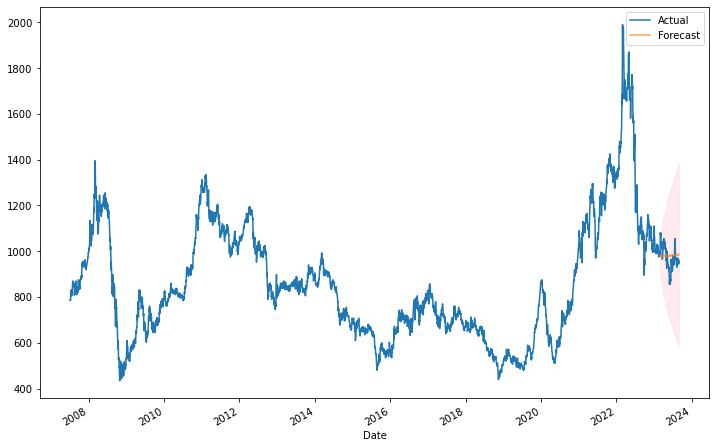

In [28]:
# Plot actual and forecasted values
ax = df['Close'].plot(figsize=(12, 8), label='Actual')
forecast.predicted_mean.plot(ax=ax, label='Forecast', alpha=0.7)
ax.fill_between(forecast.conf_int().index, forecast.conf_int()['lower Close'], forecast.conf_int()['upper Close'], color='pink', alpha=0.3)
plt.legend()
plt.show()

In [29]:
from pandas.tseries.offsets import Day

# Adjusting the dataframe
last_date = df.index[-1]

# Generate future dates in days
future_dates = [last_date + Day(x) for x in range(1, 13)]

In [30]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [31]:
future_datest_df.tail()

,Close,Close First Difference,forecast
2023-09-07,NaN,NaN,NaN
2023-09-08,NaN,NaN,NaN
2023-09-09,NaN,NaN,NaN
2023-09-10,NaN,NaN,NaN
2023-09-11,NaN,NaN,NaN


In [32]:
future_df=pd.concat([df,future_datest_df])

C:\Users\andre\AppData\Local\Temp\ipykernel_15996\1723908026.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  future_df=pd.concat([df,future_datest_df])


In [33]:
# Generate forecasts with proper datetime index
forecast_start_1 = pd.to_datetime('2023-08-21')
forecast_end_1 = pd.to_datetime('2023-08-30')
forecast_1 = results.get_prediction(start=forecast_start_1, end=forecast_end_1, dynamic=True)

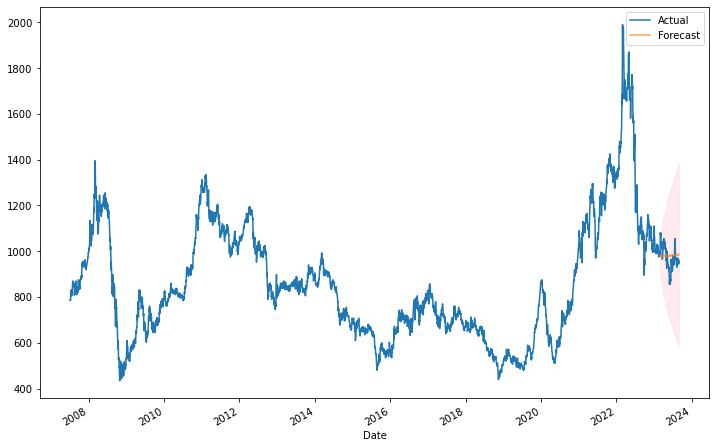

In [34]:
# Plot actual and forecasted values
ax = df['Close'].plot(figsize=(12, 8), label='Actual')
forecast.predicted_mean.plot(ax=ax, label='Forecast', alpha=0.7)
ax.fill_between(forecast.conf_int().index, forecast.conf_int()['lower Close'], forecast.conf_int()['upper Close'], color='pink', alpha=0.3)
plt.legend()
plt.show()